In [3]:
import matplotlib.pyplot as plt
import matplotlib
import mpld3
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
import astropy.units as u
from astropy.constants import G, c, M_jup, M_sun

In [32]:
x=(1*u.solMass)**2*G/(1*u.kpc)**2
x.decompose().to(u.keV/u.kpc)

<Quantity 5.341067973817616e+46 keV / kpc>

In [33]:
x=(1*u.solMass)**2*G
x.decompose().to(u.keV*u.kpc)

<Quantity 5.341067973817615e+46 keV kpc>

In [25]:
#(1*u.kpc).decompose()
print 1.99e30**2/(3.08e19)**2
print ((1*u.solMass)**2/(1*u.kpc)**2).decompose()
print (((1*u.solMass)**2/(1*u.kpc)**2)*G).decompose().to(u.keV/u.kpc)

4.17450244561e+21
4.15539338745e+21 kg2 / m2
5.34106797382e+46 keV / kpc


In [35]:
print (((1*u.solMass)**2*G)).decompose().to(u.keV*u.kpc)

5.34106797382e+46 keV kpc


In [5]:
class HighlightLines(mpld3.plugins.PluginBase):
    """A plugin to highlight lines on hover"""

    JAVASCRIPT = """
    mpld3.register_plugin("linehighlight", LineHighlightPlugin);
    LineHighlightPlugin.prototype = Object.create(mpld3.Plugin.prototype);
    LineHighlightPlugin.prototype.constructor = LineHighlightPlugin;
    LineHighlightPlugin.prototype.requiredProps = ["line_ids"];
    LineHighlightPlugin.prototype.defaultProps = {alpha_bg:0.3, alpha_fg:1.0}
    function LineHighlightPlugin(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    LineHighlightPlugin.prototype.draw = function(){
      for(var i=0; i<this.props.line_ids.length; i++){
         var obj = mpld3.get_element(this.props.line_ids[i], this.fig),
             alpha_fg = this.props.alpha_fg;
             alpha_bg = this.props.alpha_bg;
         obj.elements()
             .on("mouseover.highlight", function(d, i){
                            d3.select(this).transition().duration(50)
                              .style("stroke-opacity", alpha_fg); })
             .on("mouseout.highlight", function(d, i){
                            d3.select(this).transition().duration(200)
                              .style("stroke-opacity", alpha_bg); });
      }
    };
    """
    def __init__(self, lines):
        self.lines = lines
        self.dict_ = {"type": "linehighlight",
                      "line_ids": [mpld3.utils.get_id(line) for line in lines],
                      "alpha_bg": lines[0].get_alpha(),
                      "alpha_fg": 1.0}

## Number 1

In [6]:
def v_rad(x):
    v=(np.pi*G/p)**(1/3.)*(mp*np.sin(I))/((mp+ms)**(2/3.)*np.sqrt(1-e**2))*(np.cos(x+w)+e*np.cos(w))
    return v.decompose()

def t(u):
    t=p/(2*np.pi)*(u-e*np.sin(u))
    return t

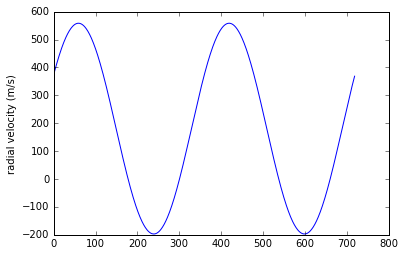

In [11]:
x=range(360*2)*u.deg

plt.plot(x,v_rad(x))
plt.ylabel('radial velocity (m/s)')

In [9]:
M_jup

<Constant name=u'Jupiter mass' value=1.8987e+27 uncertainty=5e+22 unit='kg' reference=u"Allen's Astrophysical Quantities 4th Ed.">

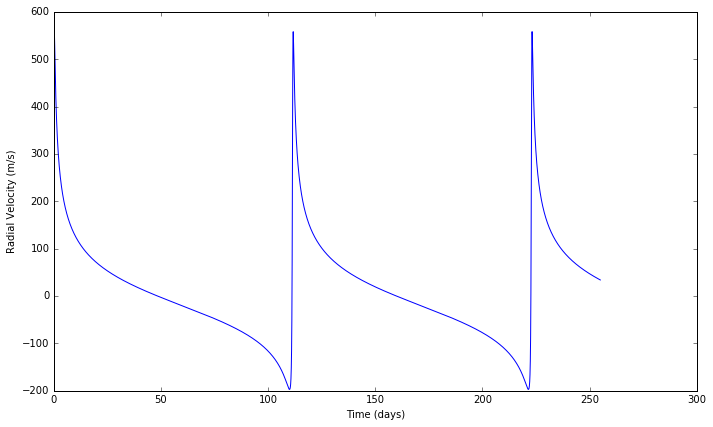

In [15]:
mp=4.2*M_jup
ms=1.05*M_sun
p=111.44*u.day
e=0.933
I=89.32*u.deg
w=300.83*u.deg

fig, ax = plt.subplots(1, figsize=(10,6))

us=np.arange(1500)*0.01
tus=t(us)
phi=[(2.*np.arctan(np.sqrt((1.+e)/(1.-e))*np.tan(i/2.))) for i in us]
phi_u=(phi*u.rad).to(u.deg)

#ax[0].plot(tus,phi_u)
ax.plot(tus,v_rad(phi_u))
ax.set_xlabel("Time (days)")
ax.set_ylabel("Radial Velocity (m/s)")
plt.tight_layout()

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
num=10
vrads=[]

for j in range(num):
    e=j/10.
    us=np.arange(1500)*0.01
    tus=t(us)
    phi=[(2.*np.arctan(np.sqrt((1.+e)/(1.-e))*np.tan(i/2.))) for i in us]
    phi_u=(phi*u.rad).to(u.deg)
    vrads.append(v_rad(phi_u))
    
v_rads = np.array(vrads)
lines=ax.plot(tus,v_rads.T,alpha=0.1,lw=3)

mpld3.plugins.connect(fig, HighlightLines(lines))    

for i in range(num):
    tooltip = mpld3.plugins.LineLabelTooltip(ax.get_lines()[i], 'e='+str(i/10.))
    mpld3.plugins.connect(fig, tooltip) 

mpld3.display(fig)

## Number 6

In [18]:
from astropy.constants import k_B, h, m_e
m_h=1.67e-27*u.kg
n_a=6.023e23*(u.mol)**-1
m_c=1*u.g/u.mol

3.77581931855e-07 kg / m3


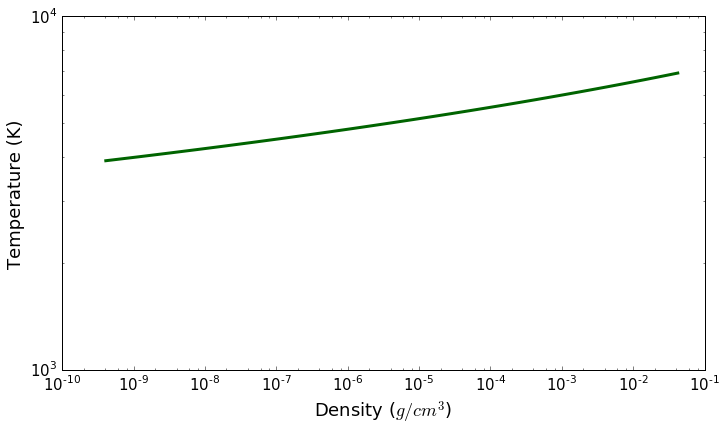

In [17]:
def rho(T):
    return (2./n_a*(2.*np.pi*m_h*k_B/h**2)**(3./2.)*T**(3./2.))*np.e**(-13.6*u.eV/(k_B*T))*m_c

print rho(5777.*u.K).decompose()

Ts=np.arange(3900.,7000.,100)*u.K

fig, ax = plt.subplots(1, figsize=(10,6))

ax.plot(rho(Ts),Ts,lw=3,c='darkgreen')
ax.set_ylabel("Temperature (K)", fontsize=18)
ax.set_xlabel("Density ($g/cm^3$)", fontsize=18)
ax.set_xscale('log')
ax.set_yscale('log')

plt.tight_layout()
plt.tick_params(labelsize=15)


In [83]:
Ts,rho(Ts)

(<Quantity [ 3900., 4000., 4100., 4200., 4300., 4400., 4500., 4600., 4700.,
             4800., 4900., 5000., 5100., 5200., 5300., 5400., 5500., 5600.,
             5700., 5800., 5900., 6000., 6100., 6200., 6300., 6400., 6500.,
             6600., 6700., 6800., 6900.] K>,
 <Quantity [  4.08227738e-10,  1.16616744e-09,  3.16795917e-09,
              8.21313627e-09,  2.03871254e-08,  4.85959098e-08,
              1.11533695e-07,  2.47081348e-07,  5.29512064e-07,
              1.10003721e-06,  2.21950135e-06,  4.35687845e-06,
              8.33419963e-06,  1.55583608e-05,  2.83837636e-05,
              5.06679293e-05,  8.86062375e-05,  1.51963044e-04,
              2.55856021e-04,  4.23300096e-04,  6.88778393e-04,
              1.10318155e-03,  1.74054530e-03,  2.70712055e-03,
              4.15343150e-03,  6.29011701e-03,  9.40850877e-03,
              1.39070774e-02,  2.03250746e-02,  2.93849171e-02,
              4.20450892e-02] g kg(3/2) / (J(3/2) s3)>)

In [42]:
rho(5777.*u.K).decompose()

<Quantity 0.00037758193185544967 1 / (m3 mol)>

In [48]:
np.arange(3000.,200000.,1000)*u.K

<Quantity [   3000.,   4000.,   5000.,   6000.,   7000.,   8000.,   9000.,
             10000.,  11000.,  12000.,  13000.,  14000.,  15000.,  16000.,
             17000.,  18000.,  19000.,  20000.,  21000.,  22000.,  23000.,
             24000.,  25000.,  26000.,  27000.,  28000.,  29000.,  30000.,
             31000.,  32000.,  33000.,  34000.,  35000.,  36000.,  37000.,
             38000.,  39000.,  40000.,  41000.,  42000.,  43000.,  44000.,
             45000.,  46000.,  47000.,  48000.,  49000.,  50000.,  51000.,
             52000.,  53000.,  54000.,  55000.,  56000.,  57000.,  58000.,
             59000.,  60000.,  61000.,  62000.,  63000.,  64000.,  65000.,
             66000.,  67000.,  68000.,  69000.,  70000.,  71000.,  72000.,
             73000.,  74000.,  75000.,  76000.,  77000.,  78000.,  79000.,
             80000.,  81000.,  82000.,  83000.,  84000.,  85000.,  86000.,
             87000.,  88000.,  89000.,  90000.,  91000.,  92000.,  93000.,
             94000.,  950

In [21]:
13.6*u.keV

<Quantity 13.6 keV>

In [34]:
np.arange(10,20,1)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])